## Task 4: Employee Ranking

### Generate monthly rankings of employees based on their monthly sentiment scores:
1. Top 3 Positive Employees → highest monthly scores

2. Top 3 Negative Employees → lowest (most negative) monthly scores

### Sorting rules:

1. Primary: Score (descending for positive, ascending for negative)

2. Secondary: Alphabetical (employee email)

In [5]:
import pandas as pd

# Load monthly sentiment scores
df_scores = pd.read_csv("employee_monthly_sentiment_scores.csv")
df_scores['year_month'] = pd.to_datetime(df_scores['year_month'], format='%Y-%m').dt.to_period('M')

# Initialize empty lists to store rankings
top_positive = []
top_negative = []

# Process rankings month by month
for month, group in df_scores.groupby('year_month'):
    
    # Top 3 Positive Employees
    top_pos = (
        group.sort_values(by=['monthly_sentiment_score', 'from'], ascending=[False, True])
        .head(3)
        .assign(rank='Top Positive', year_month=str(month))
    )
    
    # Top 3 Negative Employees
    top_neg = (
        group.sort_values(by=['monthly_sentiment_score', 'from'], ascending=[True, True])
        .head(3)
        .assign(rank='Top Negative', year_month=str(month))
    )
    
    top_positive.append(top_pos)
    top_negative.append(top_neg)

# Combine results
ranked_employees = pd.concat(top_positive + top_negative)

# Reorder columns for clarity
ranked_employees = ranked_employees[['year_month', 'rank', 'from', 'monthly_sentiment_score']]

# Save to CSV
ranked_employees.to_csv("employee_monthly_rankings.csv", index=False)

# Display sample
ranked_employees.head(12)


,year_month,rank,from,monthly_sentiment_score
120,2010-01,Top Positive,kayne.coulter@enron.com,13
48,2010-01,Top Positive,eric.bass@enron.com,9
144,2010-01,Top Positive,lydia.delgado@enron.com,9
73,2010-02,Top Positive,john.arnold@enron.com,11
97,2010-02,Top Positive,johnny.palmer@enron.com,10
1,2010-02,Top Positive,bobette.riner@ipgdirect.com,7
218,2010-03,Top Positive,sally.beck@enron.com,11
74,2010-03,Top Positive,john.arnold@enron.com,7
2,2010-03,Top Positive,bobette.riner@ipgdirect.com,6
27,2010-04,Top Positive,don.baughman@enron.com,9


In [8]:
top_positive_df = ranked_employees[ranked_employees['rank'] == 'Top Positive']
print(top_positive_df.to_markdown(index=False))


| year_month   | rank         | from                        |   monthly_sentiment_score |
|:-------------|:-------------|:----------------------------|--------------------------:|
| 2010-01      | Top Positive | kayne.coulter@enron.com     |                        13 |
| 2010-01      | Top Positive | eric.bass@enron.com         |                         9 |
| 2010-01      | Top Positive | lydia.delgado@enron.com     |                         9 |
| 2010-02      | Top Positive | john.arnold@enron.com       |                        11 |
| 2010-02      | Top Positive | johnny.palmer@enron.com     |                        10 |
| 2010-02      | Top Positive | bobette.riner@ipgdirect.com |                         7 |
| 2010-03      | Top Positive | sally.beck@enron.com        |                        11 |
| 2010-03      | Top Positive | john.arnold@enron.com       |                         7 |
| 2010-03      | Top Positive | bobette.riner@ipgdirect.com |                         6 |
| 2010-04 

In [9]:
flight_risk_df = pd.read_csv("flight_risk_employees.csv")
print(flight_risk_df.to_markdown(index=False))


| flight_risk_employee        |
|:----------------------------|
| johnny.palmer@enron.com     |
| sally.beck@enron.com        |
| bobette.riner@ipgdirect.com |
| don.baughman@enron.com      |


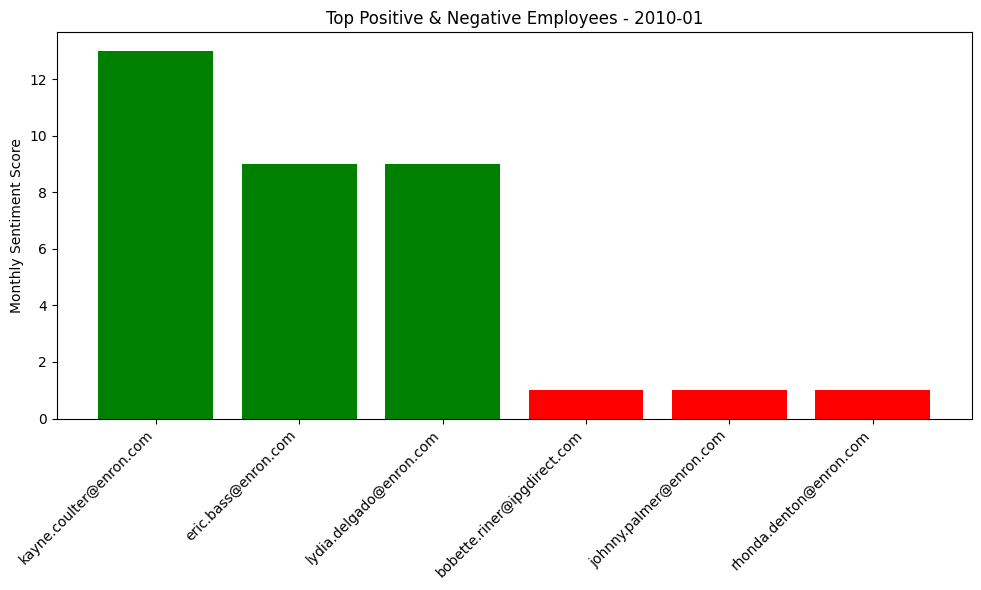

In [10]:
import matplotlib.pyplot as plt

# plot top 3 positive vs negative for a specific month
month_to_plot = '2010-01'
plot_data = ranked_employees[ranked_employees['year_month'] == month_to_plot]

plt.figure(figsize=(10,6))
colors = plot_data['rank'].map({'Top Positive':'green', 'Top Negative':'red'})
plt.bar(plot_data['from'], plot_data['monthly_sentiment_score'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.title(f"Top Positive & Negative Employees - {month_to_plot}")
plt.ylabel("Monthly Sentiment Score")
plt.tight_layout()
plt.show()


##### The monthly rankings of employees were derived directly from the monthly sentiment scores calculated in Task 3. For each calendar month, employees were sorted based on their cumulative sentiment score: the highest scores were used to identify the Top 3 Positive Employees, while the lowest (most negative) scores identified the Top 3 Negative Employees. In cases where multiple employees had the same score, alphabetical sorting by email address was applied to break ties, ensuring consistent and reproducible rankings. This approach provides a clear and objective measure of employee engagement and sentiment trends over time, highlighting individuals with consistently positive or negative communication patterns.